In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

In [ ]:
pisa = pd.read_csv("pisa20162018.csv")
pisa.columns = ["year", "subject", "country", "score", "rank"]
pisa

,year,subject,country,score,rank
0,2006,Maths,Albania,NaN,NaN
1,2006,Maths,Algeria,NaN,NaN
2,2006,Maths,Argentina,NaN,NaN
3,2006,Maths,Australia,520.0,12.0
4,2006,Maths,Austria,505.0,17.0
...,...,...,...,...,...
1107,2018,Reading,Morocco,359.0,74.0
1108,2018,Reading,Kosovo,353.0,75.0
1109,2018,Reading,Lebanon,353.0,75.0
1110,2018,Reading,Dominican Republic,342.0,77.0


In [ ]:
countries = pd.read_csv("countries.csv")
countries.columns = [
    "country",
    "region",
    "population",
    "area",
    "pop_density",
    "coastline",
    "net_migration",
    "infant_mortality",
    "gdp",
    "literacy",
    "phones_per_1000",
    "arable",
    "crops",
    "other",
    "climate",
    "birthrate",
    "deathrate",
    "agriculture",
    "industry",
    "service",
]
countries

,country,region,population,area,pop_density,coastline,net_migration,infant_mortality,gdp,literacy,phones_per_1000,arable,crops,other,climate,birthrate,deathrate,agriculture,industry,service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,West Bank,NEAR EAST,2460492,5860,"419,9","0,00","2,98","19,62",800.0,NaN,"145,2","16,9","18,97","64,13",3,"31,67","3,92","0,09","0,28","0,63"
223,Western Sahara,NORTHERN AFRICA,273008,266000,"1,0","0,42",NaN,NaN,NaN,NaN,NaN,"0,02",0,"99,98",1,NaN,NaN,NaN,NaN,"0,4"
224,Yemen,NEAR EAST,21456188,527970,"40,6","0,36",0,"61,5",800.0,"50,2","37,2","2,78","0,24","96,98",1,"42,89","8,3","0,135","0,472","0,393"
225,Zambia,SUB-SAHARAN AFRICA,11502010,752614,"15,3","0,00",0,"88,29",800.0,"80,6","8,2","7,08","0,03","92,9",2,41,"19,93","0,22","0,29","0,489"


In [ ]:
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   country           227 non-null    object 
 1   region            227 non-null    object 
 2   population        227 non-null    int64  
 3   area              227 non-null    int64  
 4   pop_density       227 non-null    object 
 5   coastline         227 non-null    object 
 6   net_migration     224 non-null    object 
 7   infant_mortality  224 non-null    object 
 8   gdp               226 non-null    float64
 9   literacy          209 non-null    object 
 10  phones_per_1000   223 non-null    object 
 11  arable            225 non-null    object 
 12  crops             225 non-null    object 
 13  other             225 non-null    object 
 14  climate           205 non-null    object 
 15  birthrate         224 non-null    object 
 16  deathrate         223 non-null    object 
 1

In [ ]:
countries.dtypes

country              object
region               object
population            int64
area                  int64
pop_density          object
coastline            object
net_migration        object
infant_mortality     object
gdp                 float64
literacy             object
phones_per_1000      object
arable               object
crops                object
other                object
climate              object
birthrate            object
deathrate            object
agriculture          object
industry             object
service              object
dtype: object

In [ ]:
countries["country"] = countries["country"].apply(lambda x: x.strip())
countries["region"] = countries["region"].apply(lambda x: x.strip())
countries["pop_density"] = countries["pop_density"].apply(lambda x: float(str(x).replace(",", ".")))
countries["coastline"] = countries["coastline"].apply(
    lambda x: float(str(x).replace(",", "."))
)
countries["net_migration"] = countries["net_migration"].apply(
    lambda x: float(str(x).replace(",", "."))
)
countries["infant_mortality"] = countries["infant_mortality"].apply(
    lambda x: float(str(x).replace(",", "."))
)
countries["literacy"] = countries["literacy"].apply(
    lambda x: float(str(x).replace(",", "."))
)
countries["phones_per_1000"] = countries["phones_per_1000"].apply(
    lambda x: float(str(x).replace(",", "."))
)
countries["arable"] = countries["arable"].apply(
    lambda x: float(str(x).replace(",", "."))
)
countries["crops"] = countries["crops"].apply(lambda x: float(str(x).replace(",", ".")))
countries["other"] = countries["other"].apply(lambda x: float(str(x).replace(",", ".")))
countries["birthrate"] = countries["birthrate"].apply(
    lambda x: float(str(x).replace(",", "."))
)
countries["deathrate"] = countries["deathrate"].apply(
    lambda x: float(str(x).replace(",", "."))
)
countries["agriculture"] = countries["agriculture"].apply(
    lambda x: float(str(x).replace(",", "."))
)
countries["industry"] = countries["industry"].apply(
    lambda x: float(str(x).replace(",", "."))
)
countries["service"] = countries["service"].apply(lambda x: float(str(x).replace(",", ".")))
countries["climate"] = countries["climate"].apply(lambda x: float(str(x).replace(",", ".")))

In [ ]:
df = pisa.join(countries.set_index("country"), on="country", how="right")
df

,year,subject,country,score,rank,region,population,area,pop_density,coastline,net_migration,infant_mortality,gdp,literacy,phones_per_1000,arable,crops,other,climate,birthrate,deathrate,agriculture,industry,service
NaN,NaN,NaN,Afghanistan,NaN,NaN,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
0.0,2006.0,Maths,Albania,NaN,NaN,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
73.0,2009.0,Maths,Albania,377.0,53.0,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
146.0,2012.0,Maths,Albania,394.0,54.0,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
219.0,2015.0,Maths,Albania,413.0,57.0,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NaN,NaN,NaN,West Bank,NaN,NaN,NEAR EAST,2460492,5860,419.9,0.00,2.98,19.62,800.0,NaN,145.2,16.90,18.97,64.13,3.0,31.67,3.92,0.090,0.280,0.630
NaN,NaN,NaN,Western Sahara,NaN,NaN,NORTHERN AFRICA,273008,266000,1.0,0.42,NaN,NaN,NaN,NaN,NaN,0.02,0.00,99.98,1.0,NaN,NaN,NaN,NaN,0.400
NaN,NaN,NaN,Yemen,NaN,NaN,NEAR EAST,21456188,527970,40.6,0.36,0.00,61.50,800.0,50.2,37.2,2.78,0.24,96.98,1.0,42.89,8.30,0.135,0.472,0.393
NaN,NaN,NaN,Zambia,NaN,NaN,SUB-SAHARAN AFRICA,11502010,752614,15.3,0.00,0.00,88.29,800.0,80.6,8.2,7.08,0.03,92.90,2.0,41.00,19.93,0.220,0.290,0.489


In [ ]:
df.dtypes

year                float64
subject              object
country              object
score               float64
rank                float64
region               object
population            int64
area                  int64
pop_density         float64
coastline           float64
net_migration       float64
infant_mortality    float64
gdp                 float64
literacy            float64
phones_per_1000     float64
arable              float64
crops               float64
other               float64
climate             float64
birthrate           float64
deathrate           float64
agriculture         float64
industry            float64
service             float64
dtype: object

In [ ]:
df.isnull().sum()

year                151
subject             151
country               0
score               269
rank                269
region                0
population            0
area                  0
pop_density           0
coastline             0
net_migration         3
infant_mortality      3
gdp                   1
literacy             43
phones_per_1000      18
arable                2
crops                 2
other                 2
climate             166
birthrate             5
deathrate             6
agriculture          15
industry             16
service              15
dtype: int64

In [ ]:
df.dropna(subset=['score'], inplace=True)
df

,year,subject,country,score,rank,region,population,area,pop_density,coastline,net_migration,infant_mortality,gdp,literacy,phones_per_1000,arable,crops,other,climate,birthrate,deathrate,agriculture,industry,service
73.0,2009.0,Maths,Albania,377.0,53.0,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
146.0,2012.0,Maths,Albania,394.0,54.0,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
219.0,2015.0,Maths,Albania,413.0,57.0,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
365.0,2009.0,Science,Albania,391.0,54.0,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
438.0,2012.0,Science,Albania,397.0,58.0,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
802.0,2012.0,Reading,Vietnam,508.0,17.0,ASIA (EX. NEAR EAST),84402966,329560,256.1,1.05,-0.45,25.95,2500.0,90.3,187.7,19.97,5.95,74.08,2.0,16.86,6.22,0.209,0.410,0.381
875.0,2015.0,Reading,Vietnam,487.0,32.0,ASIA (EX. NEAR EAST),84402966,329560,256.1,1.05,-0.45,25.95,2500.0,90.3,187.7,19.97,5.95,74.08,2.0,16.86,6.22,0.209,0.410,0.381
900.0,2018.0,Maths,Vietnam,496.0,24.0,ASIA (EX. NEAR EAST),84402966,329560,256.1,1.05,-0.45,25.95,2500.0,90.3,187.7,19.97,5.95,74.08,2.0,16.86,6.22,0.209,0.410,0.381
958.0,2018.0,Science,Vietnam,543.0,4.0,ASIA (EX. NEAR EAST),84402966,329560,256.1,1.05,-0.45,25.95,2500.0,90.3,187.7,19.97,5.95,74.08,2.0,16.86,6.22,0.209,0.410,0.381


In [ ]:
#perintah untuk mengisi nilai null dari hasil rata-rata pada suatu kolom
df['literacy'].fillna(df['literacy'].mean(), inplace=True)
df['climate'].fillna(df['climate'].mean(), inplace=True)
df['phones_per_1000'].fillna(df['phones_per_1000'].mean(), inplace=True)
df['birthrate'].fillna(df['birthrate'].mean(), inplace=True)
df['deathrate'].fillna(df['deathrate'].mean(), inplace=True)

In [ ]:
#menunjukkan jumlah null yang ada
df.isnull().sum()

year                0
subject             0
country             0
score               0
rank                0
region              0
population          0
area                0
pop_density         0
coastline           0
net_migration       0
infant_mortality    0
gdp                 0
literacy            0
phones_per_1000     0
arable              0
crops               0
other               0
climate             0
birthrate           0
deathrate           0
agriculture         0
industry            0
service             0
dtype: int64

In [ ]:
df

,year,subject,country,score,rank,region,population,area,pop_density,coastline,net_migration,infant_mortality,gdp,literacy,phones_per_1000,arable,crops,other,climate,birthrate,deathrate,agriculture,industry,service
73.0,2009.0,Maths,Albania,377.0,53.0,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
146.0,2012.0,Maths,Albania,394.0,54.0,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
219.0,2015.0,Maths,Albania,413.0,57.0,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
365.0,2009.0,Science,Albania,391.0,54.0,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
438.0,2012.0,Science,Albania,397.0,58.0,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
802.0,2012.0,Reading,Vietnam,508.0,17.0,ASIA (EX. NEAR EAST),84402966,329560,256.1,1.05,-0.45,25.95,2500.0,90.3,187.7,19.97,5.95,74.08,2.0,16.86,6.22,0.209,0.410,0.381
875.0,2015.0,Reading,Vietnam,487.0,32.0,ASIA (EX. NEAR EAST),84402966,329560,256.1,1.05,-0.45,25.95,2500.0,90.3,187.7,19.97,5.95,74.08,2.0,16.86,6.22,0.209,0.410,0.381
900.0,2018.0,Maths,Vietnam,496.0,24.0,ASIA (EX. NEAR EAST),84402966,329560,256.1,1.05,-0.45,25.95,2500.0,90.3,187.7,19.97,5.95,74.08,2.0,16.86,6.22,0.209,0.410,0.381
958.0,2018.0,Science,Vietnam,543.0,4.0,ASIA (EX. NEAR EAST),84402966,329560,256.1,1.05,-0.45,25.95,2500.0,90.3,187.7,19.97,5.95,74.08,2.0,16.86,6.22,0.209,0.410,0.381


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.dtypes

year                float64
subject              object
country              object
score               float64
rank                float64
region               object
population            int64
area                  int64
pop_density         float64
coastline           float64
net_migration       float64
infant_mortality    float64
gdp                 float64
literacy            float64
phones_per_1000     float64
arable              float64
crops               float64
other               float64
climate             float64
birthrate           float64
deathrate           float64
agriculture         float64
industry            float64
service             float64
dtype: object

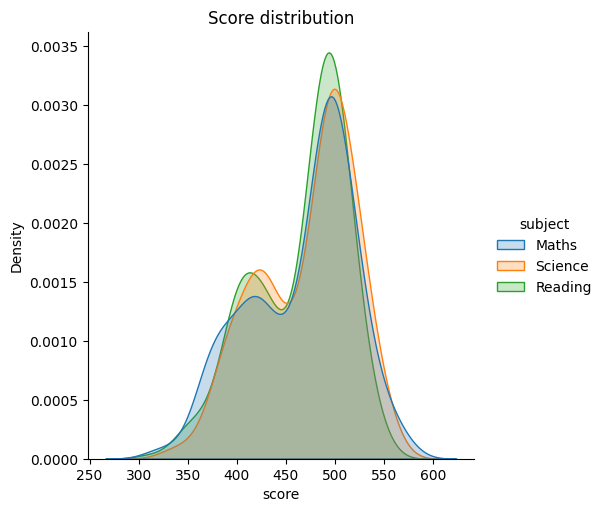

In [ ]:
# score distribution
sns.displot(df, x="score", hue="subject", kind="kde", fill=True)

plt.title("Score distribution")
plt.show()

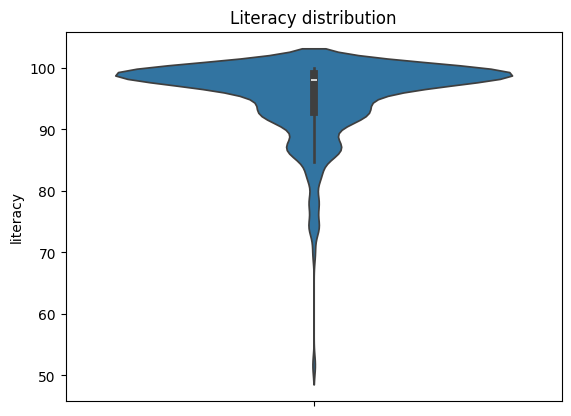

In [ ]:
sns.violinplot(df["literacy"])

plt.title("Literacy distribution")
plt.show()

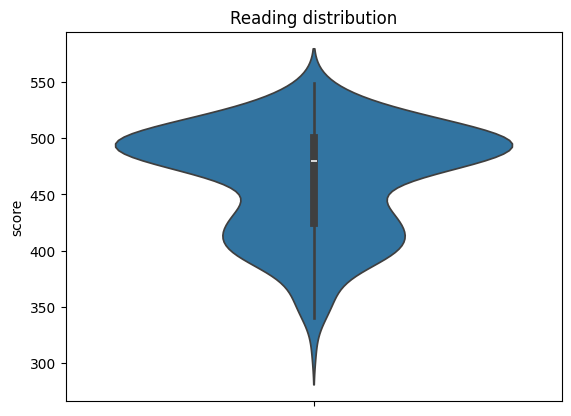

In [ ]:
sns.violinplot(df[df["subject"] == "Reading"]["score"])

plt.title("Reading distribution")
plt.show()

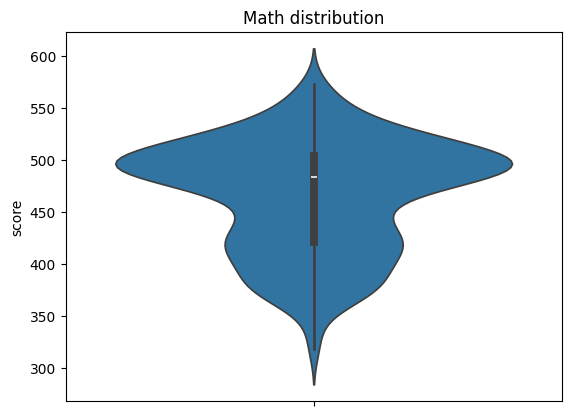

In [ ]:
sns.violinplot(df[df["subject"] == "Maths"]["score"])

plt.title("Math distribution")
plt.show()

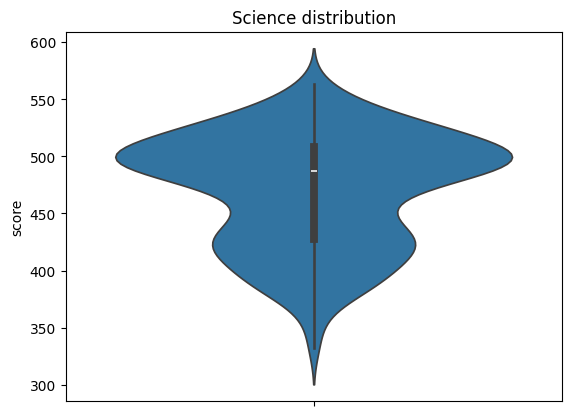

In [ ]:
sns.violinplot(df[df["subject"] == "Science"]["score"])

plt.title("Science distribution")
plt.show()

In [ ]:
df.describe()

,year,score,rank,population,area,pop_density,coastline,net_migration,infant_mortality,gdp,literacy,phones_per_1000,arable,crops,other,climate,birthrate,deathrate,agriculture,industry,service
count,898.000000,898.000000,898.000000,8.980000e+02,8.980000e+02,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000
mean,2012.551225,467.224944,33.204900,3.481942e+07,1.192096e+06,502.614254,5.720457,1.392940,12.000668,18146.213808,95.418864,371.883632,18.635122,2.628196,78.737016,2.623537,12.959006,8.487676,0.055458,0.313105,0.631440
std,4.222114,50.314247,19.328824,5.770187e+07,3.029579e+06,2094.974427,19.132855,3.496387,10.704402,11088.741673,6.120777,184.050547,14.262527,3.614891,15.125474,0.656639,4.130250,2.762946,0.049397,0.111613,0.126634
min,2006.000000,312.000000,1.000000,2.993880e+05,2.800000e+01,2.600000,0.000000,-4.930000,2.290000,1800.000000,51.700000,38.400000,0.000000,0.000000,33.910000,1.000000,7.290000,2.580000,0.000000,0.072000,0.197000
25%,2009.000000,426.000000,17.000000,4.473067e+06,4.522600e+04,31.000000,0.210000,-0.130000,4.660000,7600.000000,92.800000,220.400000,6.550000,0.270000,67.220000,2.000000,9.720000,6.212500,0.021000,0.259000,0.564000
50%,2012.000000,483.000000,32.000000,1.017501e+07,1.319400e+05,81.000000,0.720000,0.950000,6.890000,18000.000000,98.000000,384.900000,16.620000,1.000000,80.650000,3.000000,11.130000,8.680000,0.040000,0.296000,0.657000
75%,2015.000000,503.000000,48.000000,3.992183e+07,5.047820e+05,129.800000,2.850000,2.380000,18.610000,27600.000000,99.000000,500.500000,27.790000,3.130000,92.560000,3.000000,15.550000,10.310000,0.084000,0.350000,0.702000
max,2018.000000,573.000000,79.000000,2.984442e+08,1.707520e+07,16183.000000,146.430000,16.290000,81.740000,55100.000000,100.000000,898.000000,56.210000,17.610000,100.000000,4.000000,29.340000,14.650000,0.232000,0.801000,0.927000


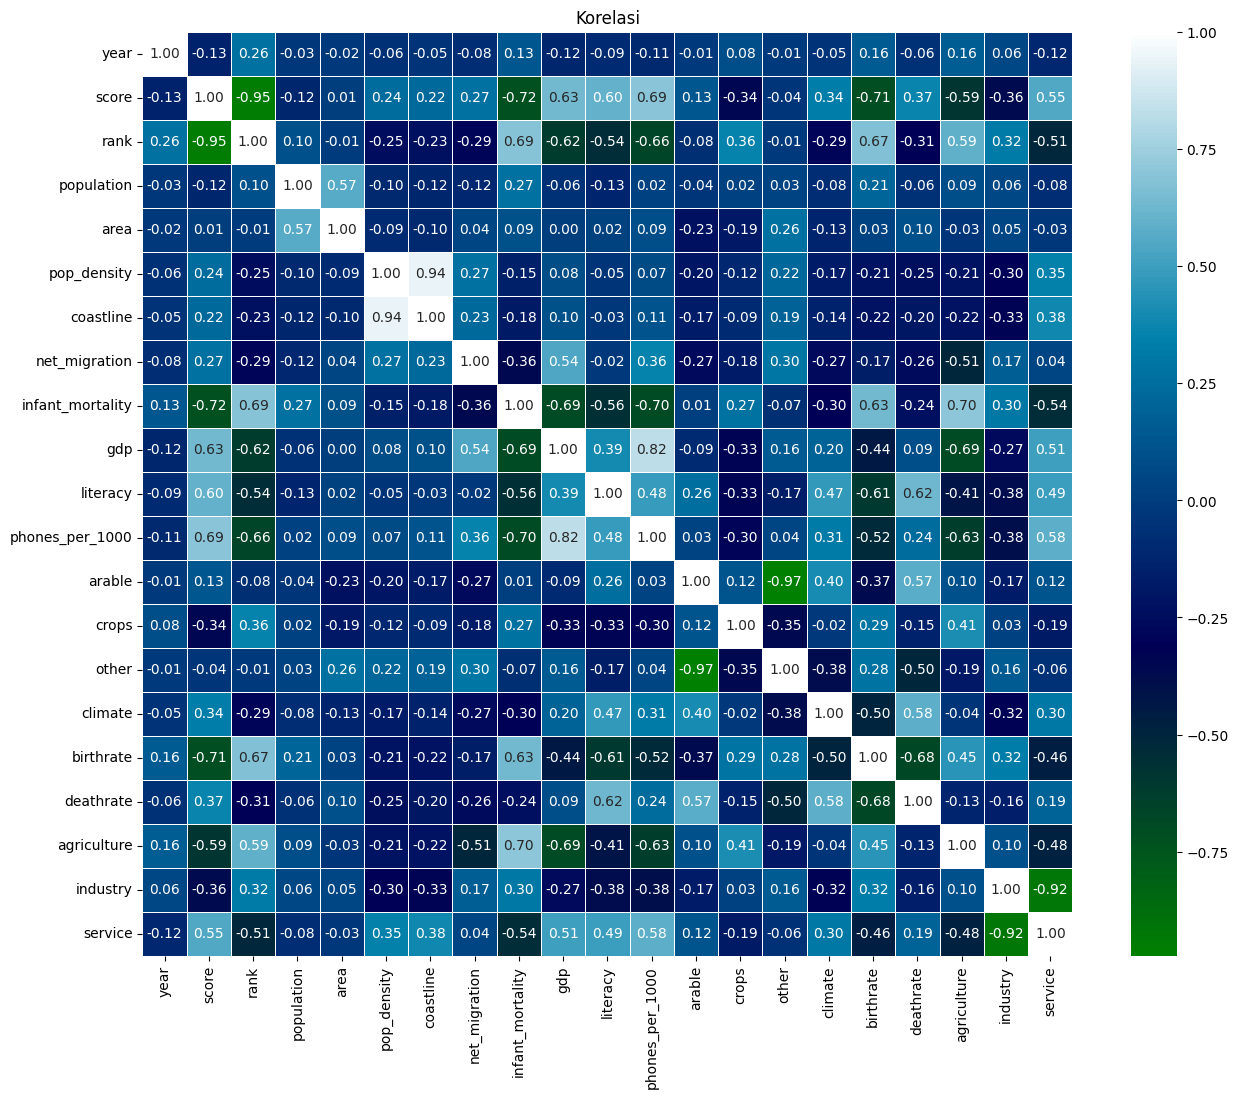

In [ ]:
numeric_data = df.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numeric_data.corr()

plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='ocean', fmt=".2f", linewidths=0.5)
plt.title('Korelasi')
plt.show()

#print(correlation_matrix)

In [ ]:
reading_scores_2006 = df[(df['subject'] == 'Reading') & (df['year'] == 2006)].sort_values(by='score', ascending=False)

reading_scores_2006.head(5)

,year,subject,country,score,rank,region,population,area,pop_density,coastline,net_migration,infant_mortality,gdp,literacy,phones_per_1000,arable,crops,other,climate,birthrate,deathrate,agriculture,industry,service
605.0,2006.0,Reading,Finland,547.0,2.0,WESTERN EUROPE,5231372,338145,15.5,0.37,0.95,3.57,27400.0,100.0,405.3,7.19,0.03,92.78,3.000000,10.45,9.86,0.028,0.295,0.676
611.0,2006.0,Reading,Hong Kong,536.0,3.0,ASIA (EX. NEAR EAST),6940432,1092,6355.7,67.12,5.24,2.97,28800.0,93.5,546.7,5.05,1.01,93.94,2.000000,7.29,6.29,0.001,0.092,0.906
594.0,2006.0,Reading,Canada,527.0,4.0,NORTHERN AMERICA,33098932,9984670,3.3,2.02,5.96,4.75,29800.0,97.0,552.2,4.96,0.02,95.02,2.623537,10.78,7.80,0.022,0.294,0.684
634.0,2006.0,Reading,New Zealand,521.0,5.0,OCEANIA,4076140,268680,15.2,5.63,4.05,5.85,21600.0,99.0,441.7,5.60,6.99,87.41,3.000000,13.76,7.53,0.043,0.273,0.684
615.0,2006.0,Reading,Ireland,517.0,6.0,WESTERN EUROPE,4062235,70280,57.8,2.06,4.99,5.39,29600.0,98.0,500.5,15.20,0.03,84.77,3.000000,14.45,7.82,0.050,0.460,0.490


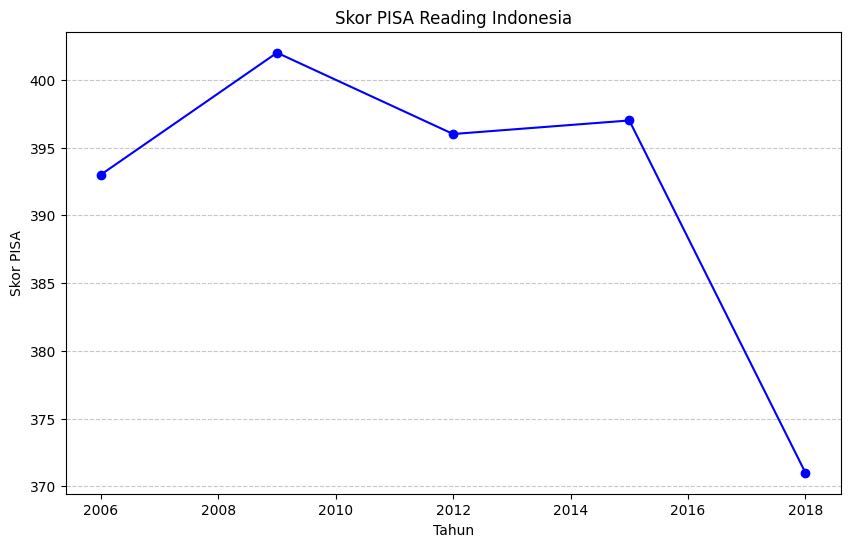

          year  subject    country  score  rank                region  \
614.0   2006.0  Reading  Indonesia  393.0  46.0  ASIA (EX. NEAR EAST)   
687.0   2009.0  Reading  Indonesia  402.0  53.0  ASIA (EX. NEAR EAST)   
760.0   2012.0  Reading  Indonesia  396.0  57.0  ASIA (EX. NEAR EAST)   
833.0   2015.0  Reading  Indonesia  397.0  67.0  ASIA (EX. NEAR EAST)   
1106.0  2018.0  Reading  Indonesia  371.0  73.0  ASIA (EX. NEAR EAST)   

        population     area  pop_density  coastline  net_migration  \
614.0    245452739  1919440        127.9       2.85            0.0   
687.0    245452739  1919440        127.9       2.85            0.0   
760.0    245452739  1919440        127.9       2.85            0.0   
833.0    245452739  1919440        127.9       2.85            0.0   
1106.0   245452739  1919440        127.9       2.85            0.0   

        infant_mortality     gdp  literacy  phones_per_1000  arable  crops  \
614.0               35.6  3200.0      87.9             52.0   

In [ ]:
reading_scores_indo = (df[(df['country'] == 'Indonesia') & (df['subject'] == 'Reading')])

plt.figure(figsize=(10, 6))
plt.plot(reading_scores_indo['year'], reading_scores_indo['score'], marker='o', color='blue')
plt.title('Skor PISA Reading Indonesia')
plt.xlabel('Tahun')
plt.ylabel('Skor PISA')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

print(reading_scores_indo)

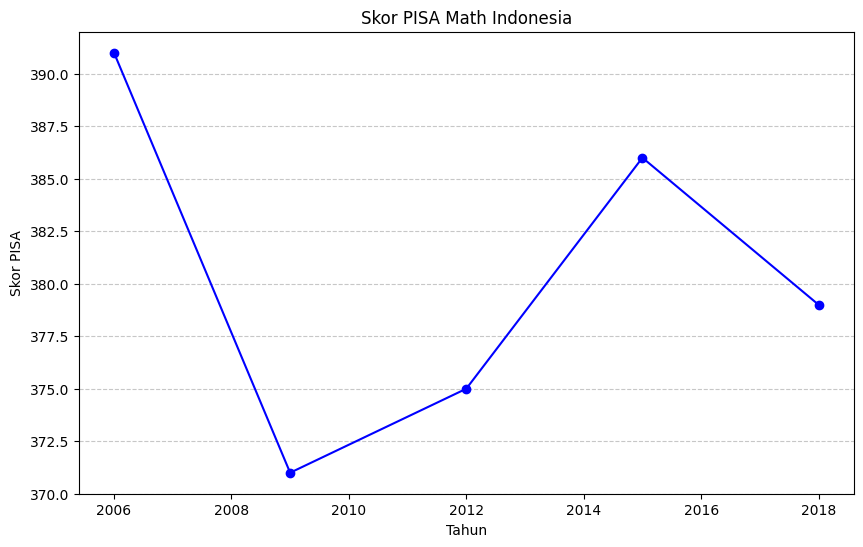

         year subject    country  score  rank                region  \
30.0   2006.0   Maths  Indonesia  391.0  47.0  ASIA (EX. NEAR EAST)   
103.0  2009.0   Maths  Indonesia  371.0  55.0  ASIA (EX. NEAR EAST)   
176.0  2012.0   Maths  Indonesia  375.0  60.0  ASIA (EX. NEAR EAST)   
249.0  2015.0   Maths  Indonesia  386.0  66.0  ASIA (EX. NEAR EAST)   
948.0  2018.0   Maths  Indonesia  379.0  72.0  ASIA (EX. NEAR EAST)   

       population     area  pop_density  coastline  net_migration  \
30.0    245452739  1919440        127.9       2.85            0.0   
103.0   245452739  1919440        127.9       2.85            0.0   
176.0   245452739  1919440        127.9       2.85            0.0   
249.0   245452739  1919440        127.9       2.85            0.0   
948.0   245452739  1919440        127.9       2.85            0.0   

       infant_mortality     gdp  literacy  phones_per_1000  arable  crops  \
30.0               35.6  3200.0      87.9             52.0   11.32   7.23   
103.

In [ ]:
reading_scores_indo = (df[(df['country'] == 'Indonesia') & (df['subject'] == 'Maths')])

plt.figure(figsize=(10, 6))
plt.plot(reading_scores_indo['year'], reading_scores_indo['score'], marker='o', color='blue')
plt.title('Skor PISA Math Indonesia')
plt.xlabel('Tahun')
plt.ylabel('Skor PISA')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

print(reading_scores_indo)

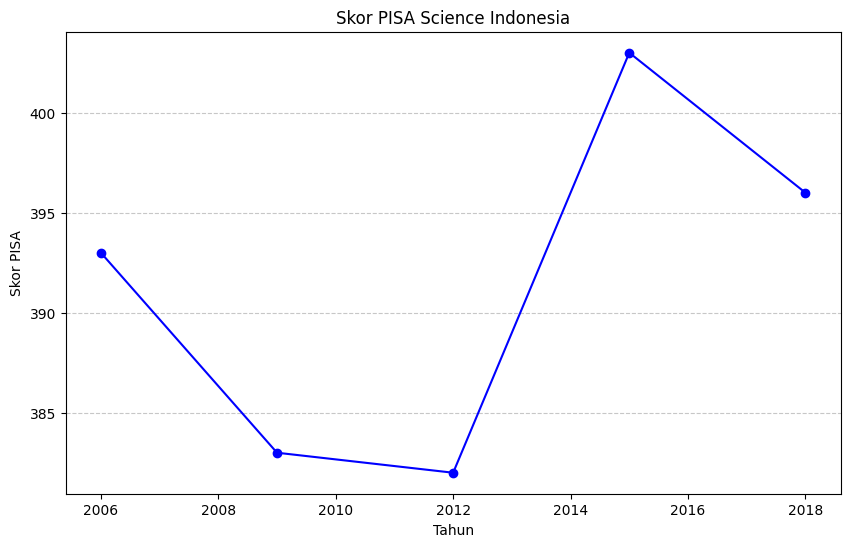

          year  subject    country  score  rank                region  \
322.0   2006.0  Science  Indonesia  393.0  48.0  ASIA (EX. NEAR EAST)   
395.0   2009.0  Science  Indonesia  383.0  55.0  ASIA (EX. NEAR EAST)   
468.0   2012.0  Science  Indonesia  382.0  60.0  ASIA (EX. NEAR EAST)   
541.0   2015.0  Science  Indonesia  403.0  65.0  ASIA (EX. NEAR EAST)   
1025.0  2018.0  Science  Indonesia  396.0  71.0  ASIA (EX. NEAR EAST)   

        population     area  pop_density  coastline  net_migration  \
322.0    245452739  1919440        127.9       2.85            0.0   
395.0    245452739  1919440        127.9       2.85            0.0   
468.0    245452739  1919440        127.9       2.85            0.0   
541.0    245452739  1919440        127.9       2.85            0.0   
1025.0   245452739  1919440        127.9       2.85            0.0   

        infant_mortality     gdp  literacy  phones_per_1000  arable  crops  \
322.0               35.6  3200.0      87.9             52.0   

In [ ]:
reading_scores_indo = (df[(df['country'] == 'Indonesia') & (df['subject'] == 'Science')])

plt.figure(figsize=(10, 6))
plt.plot(reading_scores_indo['year'], reading_scores_indo['score'], marker='o', color='blue')
plt.title('Skor PISA Science Indonesia')
plt.xlabel('Tahun')
plt.ylabel('Skor PISA')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

print(reading_scores_indo)

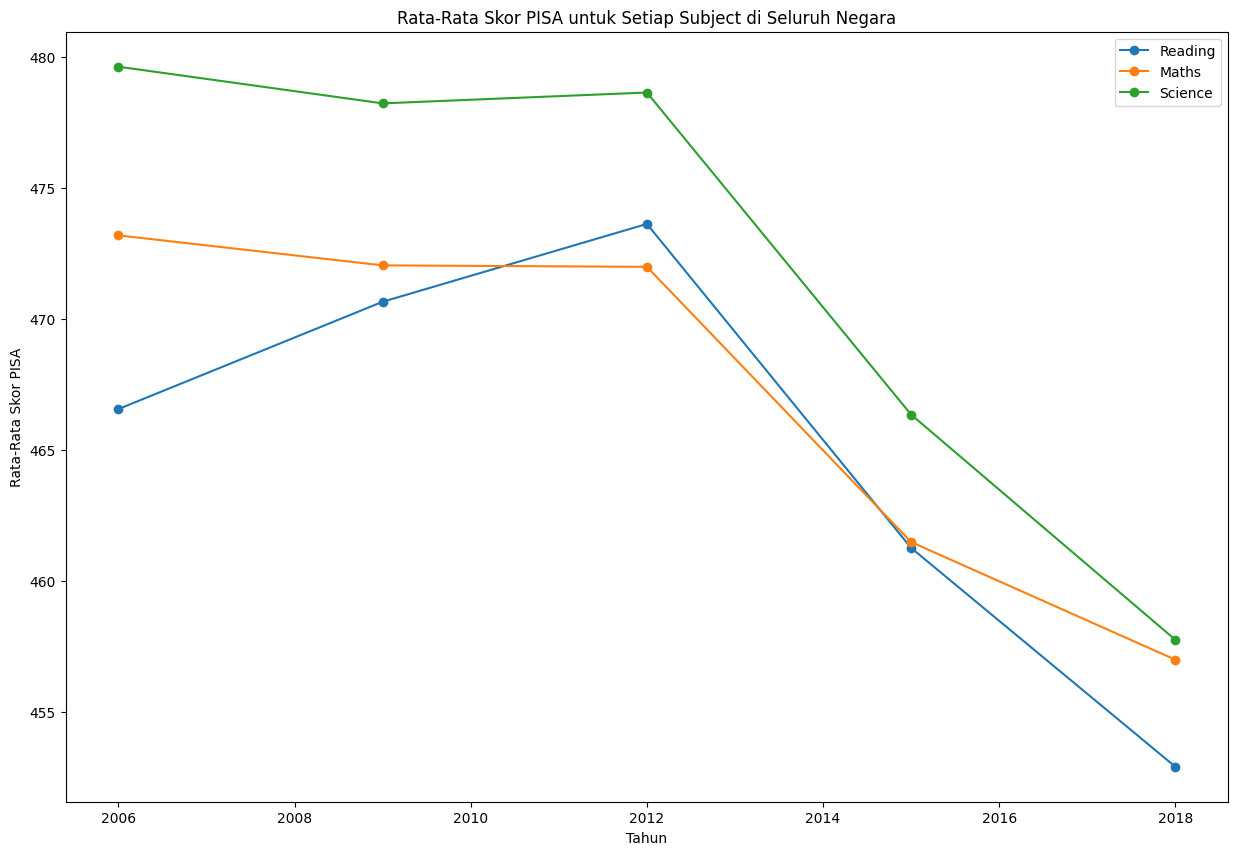

In [ ]:
reading_scores = (df[df['subject'] == 'Reading']).groupby('year')['score'].mean()
math_scores = (df[df['subject'] == 'Maths']).groupby('year')['score'].mean()
science_scores = (df[df['subject'] == 'Science']).groupby('year')['score'].mean()



plt.figure(figsize=(15, 10))

plt.plot(reading_scores.index, reading_scores.values, marker='o',  label='Reading')
plt.plot(math_scores.index, math_scores.values, marker='o', label='Maths')
plt.plot(science_scores.index, science_scores.values, marker='o', label='Science')

plt.title('Rata-Rata Skor PISA untuk Setiap Subject di Seluruh Negara')
plt.xlabel('Tahun')
plt.ylabel('Rata-Rata Skor PISA')
plt.legend()

plt.show()

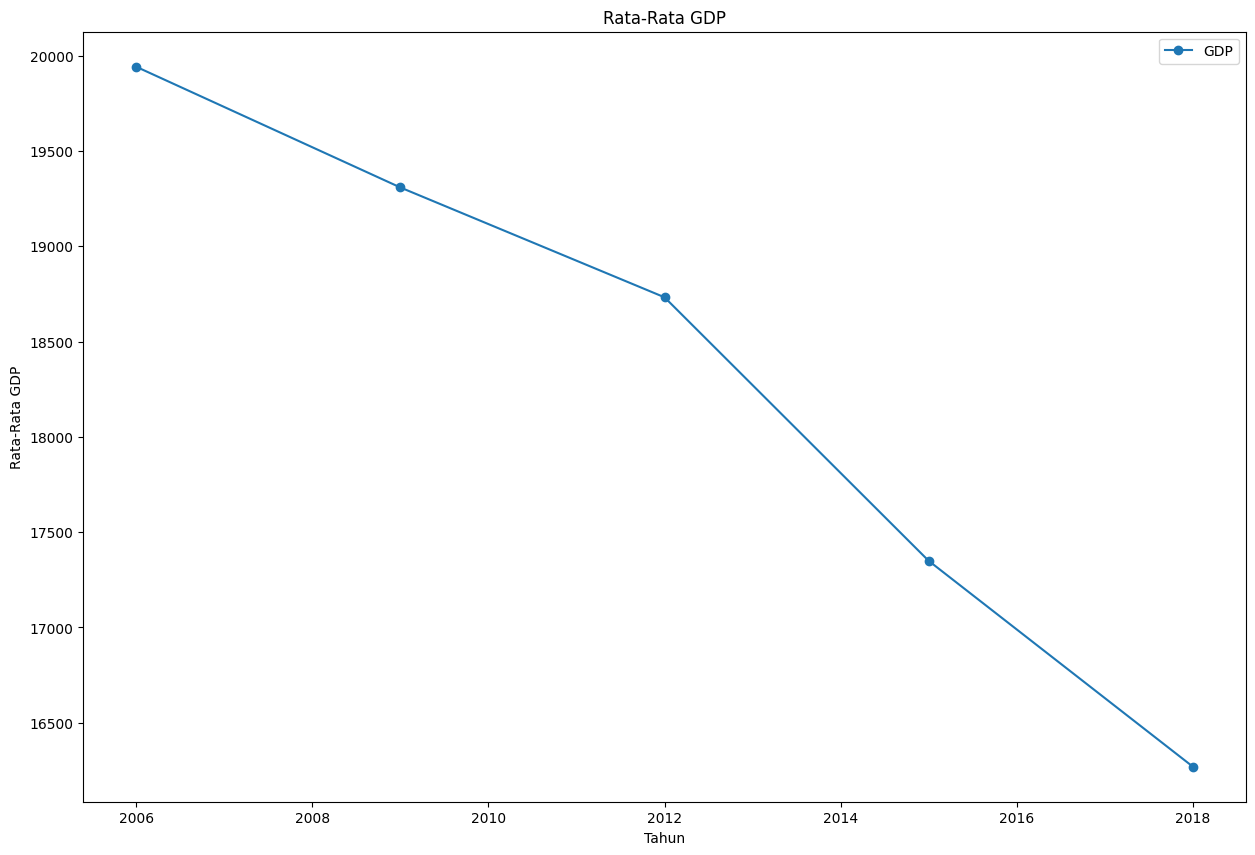

In [ ]:
gdp = df.groupby('year')['gdp'].mean()

plt.figure(figsize=(15, 10))
plt.plot(gdp.index, gdp.values, marker='o',  label='GDP')
plt.title('Rata-Rata GDP')
plt.xlabel('Tahun')
plt.ylabel('Rata-Rata GDP')
plt.legend()

plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
standar = ["population", "area", "pop_density", "coastline", "net_migration",
         "infant_mortality", "gdp", "literacy", "phones_per_1000", "arable",
         "crops", "other", "climate", "birthrate", "deathrate", "agriculture",
         "industry", "service",'score']
df[standar] = scaler.fit_transform(df[standar])

Mean Squared Error (MSE): 0.0704

Root Mean Squared Error (RMSE): 0.2653



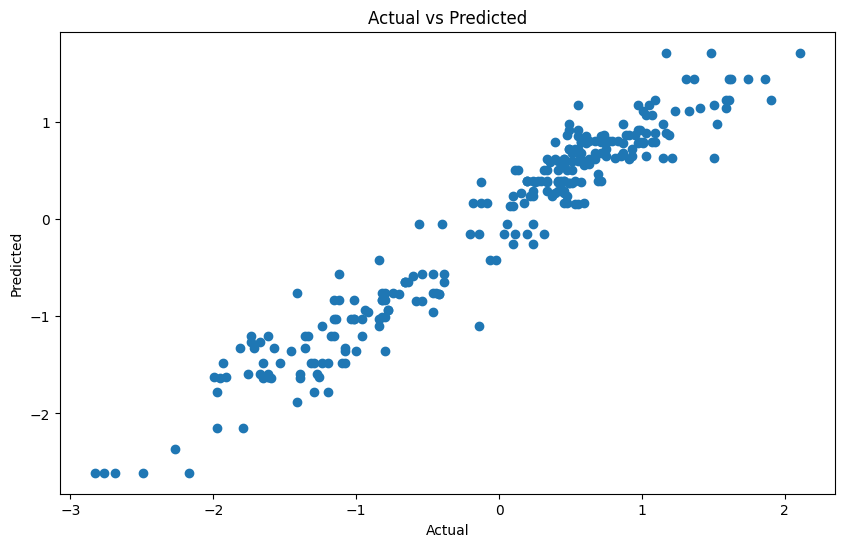

,Negara,Prediksi Skor PISA Siklus 6,Skor Asli PISA
540.0,Iceland,0.500138,0.114844
1058.0,Portugal,0.373364,0.492681
175.0,Iceland,0.500138,0.512567
288.0,United Kingdom,0.718057,0.492681
223.0,Austria,0.553996,0.592112
...,...,...,...
904.0,Portugal,0.373364,0.492681
801.0,Uruguay,-0.828644,-1.118098
1070.0,Iceland,0.500138,0.134730
255.0,Kazakhstan,-1.104841,-0.143676


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Membaca data
data = df

# Memilih fitur yang akan digunakan untuk prediksi
fitur = ["population", "area", "pop_density", "coastline", "net_migration",
         "infant_mortality", "gdp", "literacy", "phones_per_1000", "arable",
         "crops", "other", "climate", "birthrate", "deathrate", "agriculture",
         "industry", "service","country"]

# Simpan kolom 'country' sebelum mengonversi menjadi variabel dummy
nama_negara = data['country']

# Mengonversi variabel kategori 'country' menjadi variabel dummy
X = pd.get_dummies(data[fitur], columns=['country'], drop_first=True)

# Memisahkan data menjadi data latih dan data uji
y = data['score']
X_train, X_test, y_train, y_test, negara_train, negara_test = train_test_split(X, y, nama_negara, test_size=0.3, random_state=42)

# Membuat model regresi linear
model = LinearRegression()
model.fit(X_train, y_train)

# Melakukan prediksi
prediksi = model.predict(X_test)

# Menampilkan hasil prediksi untuk setiap negara
hasil_prediksi = pd.DataFrame({'Negara': negara_test, 'Prediksi Skor PISA Siklus 6': prediksi, 'Skor Asli PISA': y_test})

mse = mean_squared_error(y_test, prediksi)
rmse = np.sqrt(mse)

print(f"Mean Squared Error (MSE): {mse:.4f}\n")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}\n")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, prediksi)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title(f'Actual vs Predicted')
plt.show()

hasil_prediksi


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SelectKBest, f_regression
import statsmodels.api as sm

#P-value di bawah 0.05 menunjukkan bahwa ada bukti kuat untuk menolak hipotesis nol,
#yang biasanya berarti bahwa variabel tersebut memiliki hubungan yang signifikan dengan variabel dependen (skor PISA)

data = df

y = data["score"]
X = data.drop(["score", "country", "subject",'year','region','rank'], axis=1)

# Mengonversi kategori ke numerik (jika ada)
X = pd.get_dummies(X, drop_first=True)

# Feature Selection menggunakan f_regression
selector = SelectKBest(score_func=f_regression, k='all')
selector.fit(X, y)

# Menampilkan skor dan p-value untuk setiap fitur
scores = selector.scores_
pvalues = selector.pvalues_
features = X.columns

# Menggabungkan hasil dalam DataFrame untuk kemudahan interpretasi
feature_scores = pd.DataFrame({'Feature': features, 'Score': scores, 'P-Value': pvalues})
feature_scores = feature_scores.sort_values(by='Score', ascending=False)

print("Feature Scores and P-Values:")
print(feature_scores)

# Modeling dengan Linear Regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

# Prediksi
y_pred = model.predict(X_test)

# Evaluasi
print('\nMean Squared Error:', mean_squared_error(y_test, y_pred))
#print('\nR-squared:', r2_score(y_test, y_pred))

# Menampilkan koefisien regresi
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print("\nRegression Coefficients:")
print(coefficients)

# Menggunakan statsmodels untuk summary lebih lengkap
"""
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print("\nStatsmodels Summary:")
print(est2.summary()) """

# Identify the significant factors (p-value < 0.05)
significant_factors = [X.columns[i] for i, p in enumerate(pvalues) if p < 0.05]
print("\nSignificant factors:")
print(significant_factors)

Feature Scores and P-Values:
             Feature       Score        P-Value
5   infant_mortality  964.504040  2.554770e-144
13         birthrate  926.400495  2.739528e-140
8    phones_per_1000  830.430455  9.446353e-130
6                gdp  592.230208  7.994708e-101
7           literacy  492.707148   2.478612e-87
15       agriculture  468.164998   7.423253e-84
17           service  387.077811   6.628674e-72
14         deathrate  140.707158   2.994779e-30
16          industry  136.721293   1.702825e-29
10             crops  117.828737   7.100148e-26
12           climate  113.687294   4.512654e-25
4      net_migration   69.457137   2.915740e-16
2        pop_density   55.660611   2.035530e-13
3          coastline   47.563432   1.005245e-11
9             arable   14.513040   1.486892e-04
0         population   13.575305   2.429276e-04
11             other    1.267580   2.605225e-01
1               area    0.022853   8.798748e-01

Mean Squared Error: 0.2912650014202112

Regression Coeffic